# RANDOM FOREST

### Import libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

### Import the dataset

In [2]:
df = pd.read_csv('Iris.csv') # Iris dataset

### Dataset Analysis


In [3]:
print(df.head()) # Check the dataset header
df.info()
df['Species'].value_counts()

df.drop(["Id"], axis = 1, inplace = True) # Dropping ID column (We already have an index)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Exploratory Data Analysis

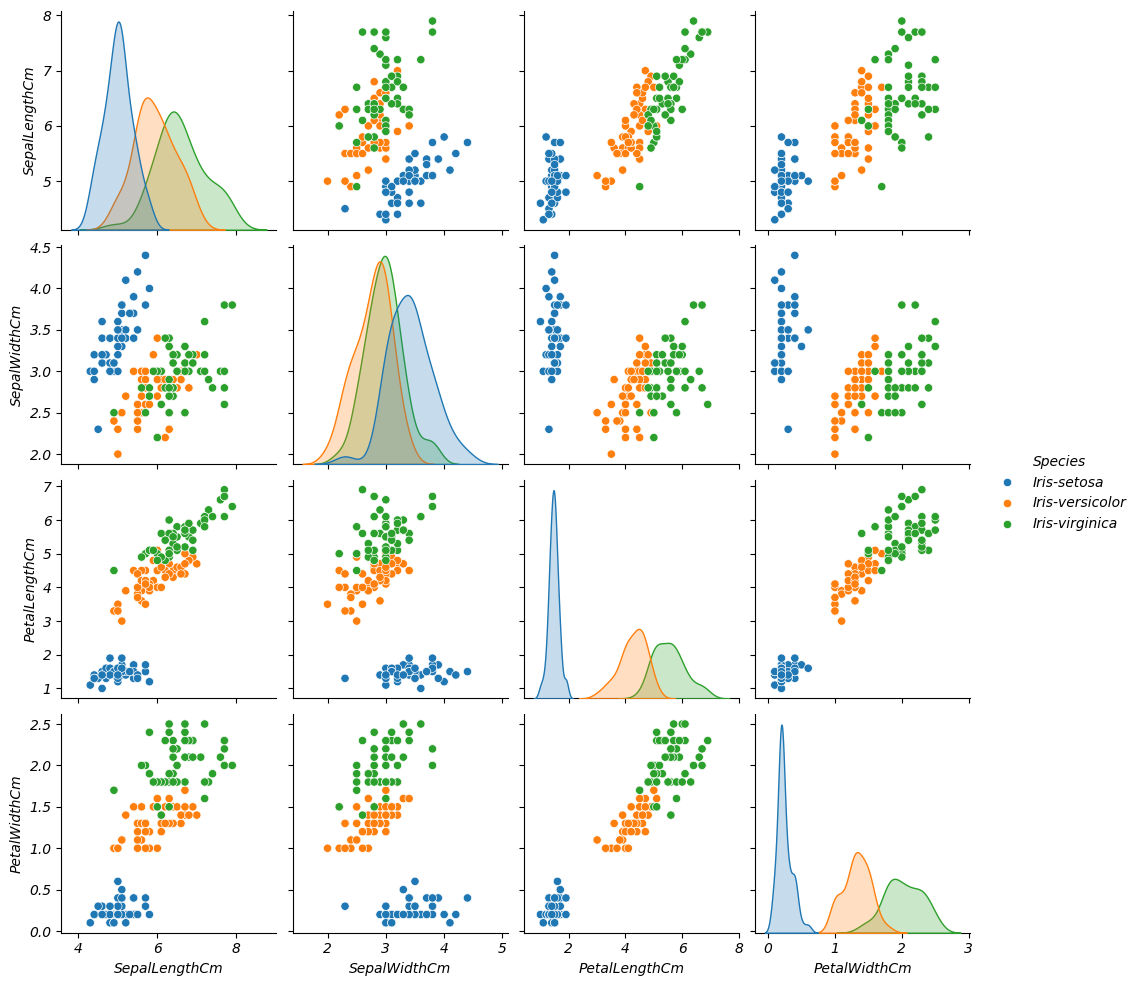

In [4]:
sns.pairplot(df, hue='Species')

In [5]:
# Converting string to number
df['Species_Num'] = df['Species']
df['Species_Num'] = df['Species_Num'].str.replace('Iris-setosa', '1')
df['Species_Num'] = df['Species_Num'].str.replace('Iris-versicolor', '2')
df['Species_Num'] = df['Species_Num'].str.replace('Iris-virginica', '3')
df['Species_Num'] = df['Species_Num'].astype(int) # Converting to int

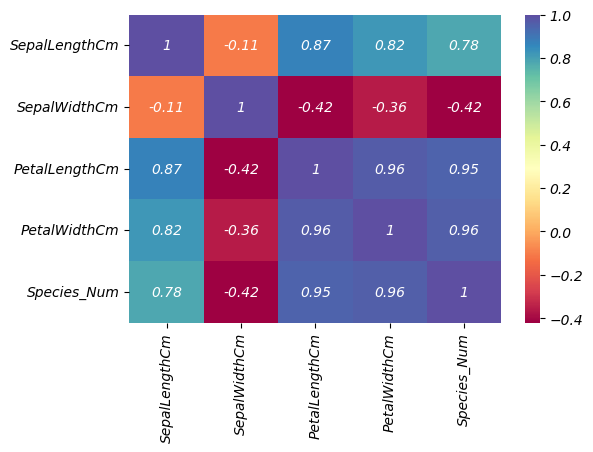

In [6]:
plt.figure(figsize = (6, 4))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap = 'Spectral')
df.drop(["Species_Num"], axis = 1, inplace = True) # The purpous of this column was to plot the heatmap
df.drop(["SepalWidthCm"], axis = 1, inplace = True) # Variable with least correlation

## RANDOM FOREST MODEL

In [7]:
y = df['Species']                       # This is the target
x = df.drop(['Species'], axis = 1)      # 

### Splitting data

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=2)

### Instantiate the model

In [9]:
rf_model = RandomForestClassifier()

### Training the model

In [10]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

### Predicting values

In [11]:
Y_pred = rf_model.predict(X_test)
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))

Accuracy Score:  0.9736842105263158


### Crossvalidation

[0.91666667 1.         0.90909091 1.         1.         1.
 0.90909091 0.90909091 1.         1.        ]
[[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



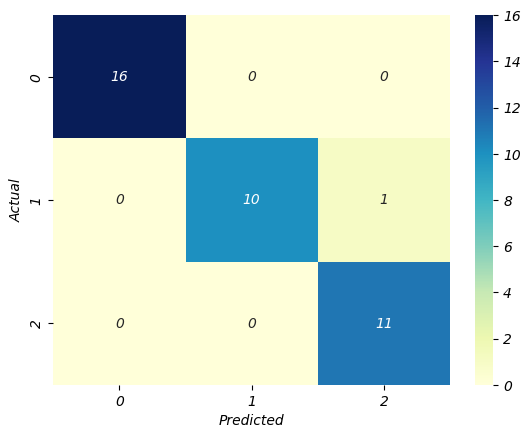

In [12]:
cv_scores = cross_val_score(estimator = rf_model, X = X_train, y = Y_train, cv = 10)
print(cv_scores)

print(confusion_matrix(Y_test, Y_pred))

cnf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')


print(classification_report(Y_test, Y_pred))

### Creating a visual tree


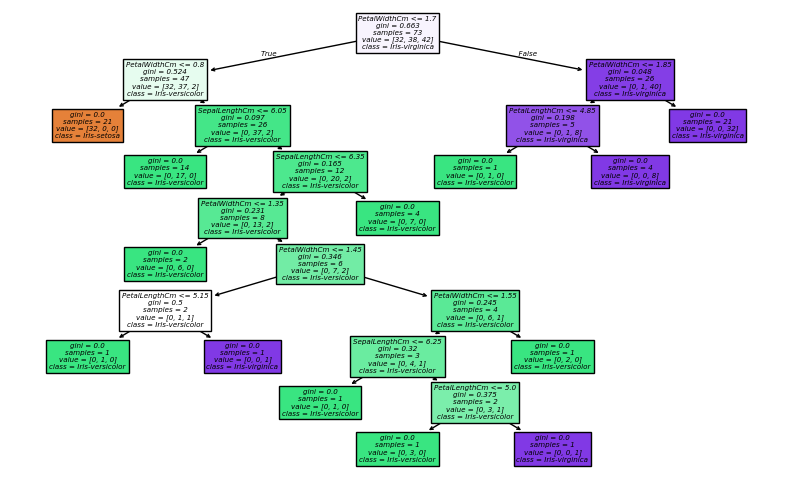

In [13]:
features = list(df.columns[:-1])
target = ['Iris-setosa','Iris-versicolor','Iris-virginica']
plt.figure(figsize = (10, 6))
tree_obj = tree.plot_tree(rf_model.estimators_[0], filled = True, feature_names=features, class_names=target)

### Hyperparameter Optimization

In [14]:
rf_model2 = RandomForestClassifier()
rf_params = {"n_estimators":[50, 100, 300],
             "max_depth":[3, 5, 7],
             "max_features":[2, 4, 6, 8],
             "min_samples_split":[2, 4, 6]}

rf_cv_model = GridSearchCV(estimator = rf_model2, param_grid = rf_params, cv = 5, n_jobs=-1)
rf_cv_model.fit(X_train, Y_train)

rf_cv_model.best_params_ # The best parameters obtained

{'max_depth': 3, 'max_features': 6, 'min_samples_split': 6, 'n_estimators': 50}

### Using the tuned parameters


In [15]:
rf_tuned = RandomForestClassifier(max_depth=3, max_features=4, min_samples_split=6, n_estimators=50)
rf_tuned.fit(X_train, Y_train)

Y_pred = rf_tuned.predict(X_test)
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))

Accuracy Score:  0.9736842105263158


### Plotting Feature Importances

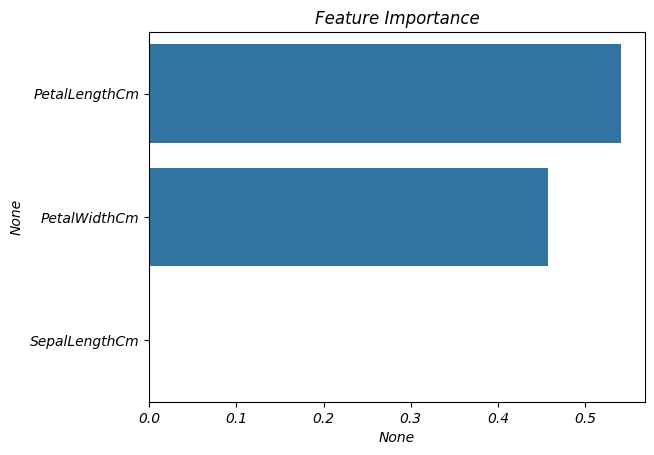

In [16]:
best_features = pd.Series(rf_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x = best_features, y = best_features.index)
plt.title("Feature Importance")
plt.show()